In [14]:
import KBs
reload(KBs)
from KBs import *

kb = kb_2dntca()
env = CA_sys(familyname='2dntca')
env.alias = 'b3s23'
env.alias2rulestr()
hist = sample(env)
ttb = env.family.rulestr2table(env.rulestr)
print 'Non-rev table:\n',ttb[:150]
print

ttb = env.family.rulestr2table(env.rulestr,reverse=1)
print 'Rev table:\n',ttb[:200]
# print hist[0::]
# showsptime(hist[:,0,:])
sp = hist[:,0,:]

Non-rev table:
@RULE b3aceijknqrys3aceijknqry2aceikn
@TABLE
n_States:2
neighborhood:Moore
symmetries:rotate4reflect
#>>>TAB<<<
0000000000
0000100000
0000010000
00001

Rev table:
@RULE rev_b3aceijknqrys3aceijknqry2aceikn
@TABLE
n_States:4
neighborhood:Moore
symmetries:rotate4reflect

var a0={0,2} ### curr0
var b0={1,3} ### curr1
var a1={0,2} ### curr0
var b1={1,3} ### curr1
va


In [70]:

def ntca2moore(binstr):
    '''
    102-bit ntCA bitstring --> 512-bit mooreCA bitstring
    '''
    out = [None]*512
    for i,res in enumerate(binstr):
        for j in ntca2rca[i]:
            out[j] = res
    return ''.join(out)
def table_variable_moore(s):
    '''
    List dummy variables (x8)
    And concatenate to the input string
    Useful for ruletables
    '''
    for i in range(8):
            s += '''
var a%d={0,2} ### curr0
var b%d={1,3} ### curr1'''%(i,i)
    s+='\n'
    return s

r = rulestr2table(kb,env.rulestr,reverse=1);
print r
# re.findall('2,.+,\d\n',r)



['a0', 'b0', 'a1', 'a2', 'b1']

In [33]:
def reverse(ruletable,sep='>>>TAB<<<'):
    head,tab = ruletable.split(sep)
#     head.replace('{0,2}','')
    tab = '\n'.join(x[::-1] for x in tab.splitlines())
    tab = tab.replace('1','?')
    tab = tab.replace('2','1')
    tab = tab.replace('?','2')
    out = head + sep + tab
    return out

# print rr==r

@RULE b3aceijknqrys3aceijknqry2aceikn
@TABLE
n_States:4
neighborhood:Moore
symmetries:none

var a={0,2}
var b={1,3}

#>>>TAB<<<
0,a,a,a,a,a,a,a,a,0
2,a,a,a,a,a,a,a,a,1
0,a,a,a,a,b,a,a,a,0
2,a,a,a,a,b,a,a,a,1
0,a,a,a,b,a,a,a,a,0
2,a,a,a,b,a,a,a,a,1
0,a,a,a,b,b,a,a,a,0
2,a,a,a,b,b,a,a,a,1
0,a,a,b,a,a,a,a,a,0
2,a,a,b,a,a,a,a,a,1
0,a,a,b,a,b,a,a,a,0
2,a,a,b,a,b,a,a,a,1
0,a,a,b,b,a,a,a,a,0
2,a,a,b,b,a,a,a,a,1
2,a,a,b,b,b,a,a,a,0
0,a,a,b,b,b,a,a,a,1
0,a,a,a,a,a,b,a,a,0
2,a,a,a,a,a,b,a,a,1
0,a,a,a,a,b,b,a,a,0
2,a,a,a,a,b,b,a,a,1
0,a,a,a,b,a,b,a,a,0
2,a,a,a,b,a,b,a,a,1
2,a,a,a,b,b,b,a,a,0
0,a,a,a,b,b,b,a,a,1
0,a,a,b,a,a,b,a,a,0
2,a,a,b,a,a,b,a,a,1
2,a,a,b,a,b,b,a,a,0
0,a,a,b,a,b,b,a,a,1
2,a,a,b,b,a,b,a,a,0
0,a,a,b,b,a,b,a,a,1
0,a,a,b,b,b,b,a,a,0
2,a,a,b,b,b,b,a,a,1
1,a,a,a,a,a,a,a,a,2
3,a,a,a,a,a,a,a,a,3
1,a,a,a,a,b,a,a,a,2
3,a,a,a,a,b,a,a,a,3
1,a,a,a,b,a,a,a,a,2
3,a,a,a,b,a,a,a,a,3
3,a,a,a,b,b,a,a,a,2
1,a,a,a,b,b,a,a,a,3
1,a,a,b,a,a,a,a,a,2
3,a,a,b,a,a,a,a,a,3
3,a,a,b,a,b,a,a,a,2
1,a,a,b,a,b,

In [23]:
# import golly as g
# !which golly
!ln -s $repos/golly_utils/glife .

In [14]:
# bool(int('0'))^int(1)
for i,j in itertools.product(range(2),range(2)):
    print i,j,i^j,
    print (i^j)^i
#     print i

0 0 0 0
0 1 1 1
1 0 1 0
1 1 0 1


In [81]:
    def rulestr2table_moore(self,rstr,reverse=0):
        '''
        512-bit rulestring --> Golly ruletable
        '''
        nState = 4 if reverse else 2
        alias = self.rulestr2alias(rstr)
        if reverse:
            alias = 'rev_%s'%alias
        s = '''@RULE {alias:}
    @TABLE
    n_States:{nState}
    neighborhood:Moore
    symmetries:none
    '''.format(alias=alias,
              nState=nState)
        if reverse:
            s= table_variable_moore(s)

        s+='''
    #>>>TAB<<<
    '''
        d = {'0':'a','1':'b'}
        if len(rstr)==26:
            binstr=hex2bin(rstr,102)[::-1]
            binstr = ntca2moore(binstr)
        else:
            binstr=hex2bin(rstr,512)[::-1]
        for i,bit in enumerate(binstr):
            conf = base2bin(str(i),10,9)
            conf = np.take(list(conf),order_gollymoore).tolist()
            if not reverse:
                line = ','.join(conf+[bit])
                s+='%s\n'%line
            else:            
                c_cur = int(conf[0])
                for c_his in [0,1]:
    #                 print c_cur+2*c_his
                    #### Use history and proposed bit to calculate next state
                    c_nex = int(bit) ^ int(c_his)  
                    lst = [str(c_cur+2*c_his)] + [d.get(x) for x in conf[1:]]+[str(c_nex+2*c_cur)]
                    line = ','.join(  lst)
                    s+='%s\n'%line
        return s
    r = rulestr2table_moore(kb,env.rulestr,reverse=1)
    # print r
    # print len(r.splitlines())
    rr = reverse(r)
    for x,y in zip(r.splitlines(),rr.splitlines()):
        print x
        print y
        print x==y
    print r

    # print rr
    # print r
    # re.findall('2,.+,\d\n',r)

@RULE rev_b3aceijknqrys3aceijknqry2aceikn
@RULE rev_b3aceijknqrys3aceijknqry2aceikn
True
@TABLE
@TABLE
True
n_States:4
n_States:4
True
neighborhood:Moore
neighborhood:Moore
True
symmetries:none
symmetries:none
True


True
var a0={0,2} ### curr0
var a0={0,2} ### curr0
True
var b0={1,3} ### curr1
var b0={1,3} ### curr1
True
var a1={0,2} ### curr0
var a1={0,2} ### curr0
True
var b1={1,3} ### curr1
var b1={1,3} ### curr1
True
var a2={0,2} ### curr0
var a2={0,2} ### curr0
True
var b2={1,3} ### curr1
var b2={1,3} ### curr1
True
var a3={0,2} ### curr0
var a3={0,2} ### curr0
True
var b3={1,3} ### curr1
var b3={1,3} ### curr1
True
var a4={0,2} ### curr0
var a4={0,2} ### curr0
True
var b4={1,3} ### curr1
var b4={1,3} ### curr1
True
var a5={0,2} ### curr0
var a5={0,2} ### curr0
True
var b5={1,3} ### curr1
var b5={1,3} ### curr1
True
var a6={0,2} ### curr0
var a6={0,2} ### curr0
True
var b6={1,3} ### curr1
var b6={1,3} ### curr1
True
var a7={0,2} ### curr0
var a7={0,2} ### curr0
True
var b7={1,3} 

1,b,b,b,b,b,a,b,a,2
1,a,b,a,b,b,b,b,b,2
False
3,b,b,b,b,b,a,b,a,3
3,a,b,a,b,b,b,b,b,3
False
1,b,b,b,a,a,b,b,a,2
1,a,b,b,a,a,b,b,b,2
False
3,b,b,b,a,a,b,b,a,3
3,a,b,b,a,a,b,b,b,3
False
1,b,b,b,b,a,b,b,a,2
1,a,b,b,a,b,b,b,b,2
False
3,b,b,b,b,a,b,b,a,3
3,a,b,b,a,b,b,b,b,3
False
1,b,b,b,a,b,b,b,a,2
1,a,b,b,b,a,b,b,b,2
False
3,b,b,b,a,b,b,b,a,3
3,a,b,b,b,a,b,b,b,3
False
1,b,b,b,b,b,b,b,a,2
1,a,b,b,b,b,b,b,b,2
False
3,b,b,b,b,b,b,b,a,3
3,a,b,b,b,b,b,b,b,3
False
0,a,a,a,a,a,a,a,b,0
0,b,a,a,a,a,a,a,a,0
False
2,a,a,a,a,a,a,a,b,1
2,b,a,a,a,a,a,a,a,1
False
0,a,a,a,b,a,a,a,b,0
0,b,a,a,a,b,a,a,a,0
False
2,a,a,a,b,a,a,a,b,1
2,b,a,a,a,b,a,a,a,1
False
0,a,a,a,a,b,a,a,b,0
0,b,a,a,b,a,a,a,a,0
False
2,a,a,a,a,b,a,a,b,1
2,b,a,a,b,a,a,a,a,1
False
0,a,a,a,b,b,a,a,b,1
2,b,a,a,b,b,a,a,a,0
False
2,a,a,a,b,b,a,a,b,0
0,b,a,a,b,b,a,a,a,1
False
0,a,a,a,a,a,b,a,b,0
0,b,a,b,a,a,a,a,a,0
False
2,a,a,a,a,a,b,a,b,1
2,b,a,b,a,a,a,a,a,1
False
0,a,a,a,b,a,b,a,b,1
2,b,a,b,a,b,a,a,a,0
False
2,a,a,a,b,a,b,a,b,0
0,b,a,b,a,b,a,

(103, 1, 16, 16)


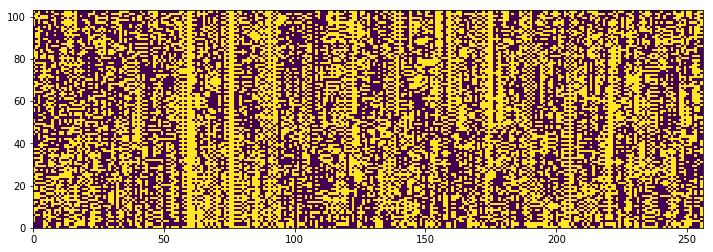

In [17]:
# def adv(rulestr):
# kb.rulestr2adv??
# ??kb.bin2adv
def sample(self,t=1,ini=None,adv = None,T = None):
    '''
    Sample an iterator ('CA_sys' object)
    '''
    if T is None:
        T = self.hmax
    if adv is None:
        adv = self.adv
    if ini is None:
        ini=self.rdf(t=t).astype(int)
    avc = ini
    hist = np.zeros((T+1+t,)+avc.shape[-3:],dtype=np.int)
    hist[:t]=avc
    for i in range(T+1):
        hist[i+t]=avc[-1]
        avc=(adv(avc)) 
    return hist

class kb_r2dntca(kb_2dntca):
    def bin2adv(self, ruleprj):
        if isinstance(ruleprj,str):
            ruleprj = list(ruleprj)
        ruleprj = np.array(ruleprj,np.int)
        def adv(a,horizon=0):
            old = a[0]
            curr = a[1]
            new  = ruleprj[self.conv(curr)]^old
            return np.array([curr,new])
                              
        return adv
kb = kb_r2dntca()
adv= kb.rulestr2adv(env.rulestr)
np.random.seed(0)
env.change_size((2,100,16**2))
ini = np.array([env.rdf(),env.rdf()])
ini = ini[:,0:1]
hist = sample(env,adv=adv,ini=ini,T=100,t=2)
print hist.shape

showsptime(hist[:,0,:])
plt.show()
# ??kb_r2dntca
# kb.rulestr2adv(rulestr)

In [45]:
lst = []
i = 0
for bs in ['b','s']:
    for i in range(9):
        lst += [bs+str(i)]
print lst

['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 's0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']


In [53]:
print len(bslist)

18


In [80]:
bslist = ['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 's0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']
def rulestr2table(self,rstr,reverse=0):
    prev={'b':'0','s':'1'}
#     binstr = base2bin(rstr,10,18)
    binstr = rstr
    nState = 4 if reverse else 2
    s = '''@RULE rev_{alias:}
@TABLE
n_States:{nState}
neighborhood:Moore
symmetries:permute
'''.format(
        alias = rstr,
#         alias=self.rulestr2alias(rstr),
          nState=nState)
    
    if reverse:
        s += '''
var a={0,2}
var b={1,3}

#>>>TAB<<<
'''
#         letters = ['a','b']
#     else:
#         letters = ['0','1']
    for i,bit in enumerate(binstr):
        conf = bslist[i]
        n1 = int(conf[-1])
        if not reverse:
            lst = [prev[conf[0]]] + ['1']*n1 + ['0']*(8-n1) + [bit] 
            line = ','.join(lst)
            s+='%s\n'%line
        else:            
            c_cur = int(conf[0])
            for c_his in [0,1]:
#                 print c_cur+2*c_his
                #### Use history and proposed bit to calculate next state
                c_nex = int(bit) ^ int(c_his)  
                lst = [str(c_cur+2*c_his)] + [d.get(x) for x in conf[1:]]+[str(c_nex+2*c_cur)]
                line = ','.join(  lst)
                s+='%s\n'%line
    return s
r = rulestr2table(kb,'000100000001100000',reverse=0)
print r

@RULE rev_000100000001100000
@TABLE
n_States:2
neighborhood:Moore
symmetries:permute
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,1,1,0,0,0,0,0,0,0
0,1,1,1,0,0,0,0,0,1
0,1,1,1,1,0,0,0,0,0
0,1,1,1,1,1,0,0,0,0
0,1,1,1,1,1,1,0,0,0
0,1,1,1,1,1,1,1,0,0
0,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,1
1,1,1,1,1,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0
1,1,1,1,1,1,1,0,0,0
1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,0



In [74]:
# env.rdf??

env.rdf = lambda self,p=0.5:(np.random.random(self.siz)<=p).astype(np.int);

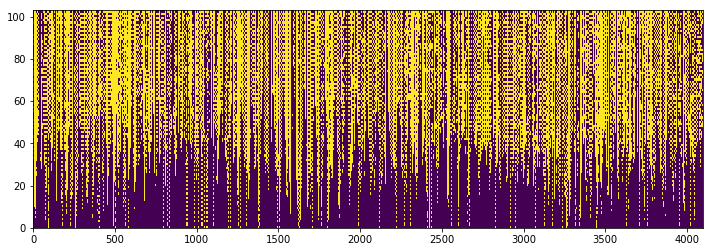

(2, 1, 64, 64)
(2, 1, 64, 64)


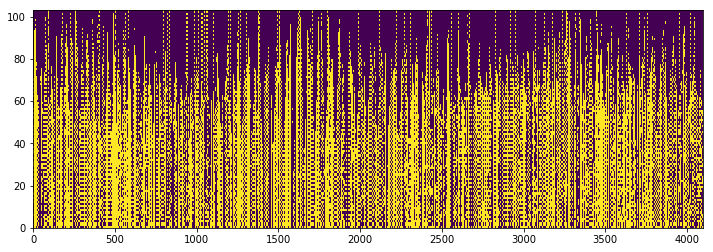

In [20]:
kb = kb_r2dntca()
adv= kb.rulestr2adv(env.rulestr)
np.random.seed(0)
env.change_size((2,100,64**2))

p = .05
ini = np.array([env.rdf(p),env.rdf(p)])
ini = ini[:,0:1]

hist = sample(env,adv=adv,ini=ini,t=2)
showsptime(hist[:,0,:])
plt.show()
# ini = ini[::-1]
ini2 = hist[-2:][::-1]
print ini.shape
print ini2.shape
hist = sample(env,adv=adv,ini=ini2,t=2)
showsptime(hist[:,0,:])
plt.show()


In [21]:
hist = sample(env,adv=adv,ini=ini,t=2)
animate(hist[:,0,:])

In [17]:
sp = hist[:,3,:]
animate(sp)

In [ ]:
def flat2dict(lst):
    '''
    Group duplicate objects 
    '''
    d = {}
    for i,val in enumerate(lst):
        d[val] = d.get(val,[]) + [i]
    return d
def appendIndex(lst):
    '''
    Add index to duplicated objects
    '''
    d  = flat2dict(lst)
    out = len(lst)* [None]
    for k,pos in d.items():
        vals = ['%s%d'%(k,i) for i in range(len(pos))]
        for i,v in zip(pos,vals):
            out[i]=v
    return out
if __name__=='__main__':
    IN = ['a','b','a','a','b']
    print IN
    print addIndex(IN)

In [ ]:
from KBs import *
ntca2rca = [[0], [1, 4, 64, 256], [2, 8, 32, 128], [3, 6, 9, 36, 72, 192, 288, 384], [5, 65, 260, 320], [7, 73, 292, 448], [10, 34, 136, 160], [11, 38, 200, 416], [12, 33, 66, 96, 129, 132, 258, 264], [13, 37, 67, 193, 262, 328, 352, 388], [14, 35, 74, 137, 164, 224, 290, 392], [15, 39, 75, 201, 294, 420, 456, 480], [16], [17, 20, 80, 272], [18, 24, 48, 144], [19, 22, 25, 52, 88, 208, 304, 400], [21, 81, 276, 336], [23, 89, 308, 464], [26, 50, 152, 176], [27, 54, 216, 432], [28, 49, 82, 112, 145, 148, 274, 280], [29, 53, 83, 209, 278, 344, 368, 404], [30, 51, 90, 153, 180, 240, 306, 408], [31, 55, 91, 217, 310, 436, 472, 496], [40, 130], [41, 44, 104, 131, 134, 194, 296, 386], [42, 138, 162, 168], [43, 46, 139, 166, 202, 232, 418, 424], [45, 195, 360, 390], [47, 203, 422, 488], [56, 146], [57, 60, 120, 147, 150, 210, 312, 402], [58, 154, 178, 184], [59, 62, 155, 182, 218, 248, 434, 440], [61, 211, 376, 406], [63, 219, 438, 504], [68, 257], [69, 261, 321, 324], [70, 76, 100, 196, 259, 265, 289, 385], [71, 77, 263, 293, 329, 356, 449, 452], [78, 228, 291, 393], [79, 295, 457, 484], [84, 273], [85, 277, 337, 340], [86, 92, 116, 212, 275, 281, 305, 401], [87, 93, 279, 309, 345, 372, 465, 468], [94, 244, 307, 409], [95, 311, 473, 500], [97, 133, 268, 322], [98, 140, 161, 266], [99, 141, 165, 225, 270, 330, 354, 396], [101, 197, 269, 323, 326, 332, 353, 389], [102, 204, 267, 417], [103, 205, 271, 331, 358, 421, 460, 481], [105, 135, 300, 450], [106, 142, 163, 169, 172, 226, 298, 394], [107, 143, 167, 233, 302, 428, 458, 482], [108, 198, 297, 387], [109, 199, 301, 361, 364, 391, 451, 454], [110, 206, 230, 236, 299, 395, 419, 425], [111, 207, 303, 423, 459, 486, 489, 492], [113, 149, 284, 338], [114, 156, 177, 282], [115, 157, 181, 241, 286, 346, 370, 412], [117, 213, 285, 339, 342, 348, 369, 405], [118, 220, 283, 433], [119, 221, 287, 347, 374, 437, 476, 497], [121, 151, 316, 466], [122, 158, 179, 185, 188, 242, 314, 410], [123, 159, 183, 249, 318, 444, 474, 498], [124, 214, 313, 403], [125, 215, 317, 377, 380, 407, 467, 470], [126, 222, 246, 252, 315, 411, 435, 441], [127, 223, 319, 439, 475, 502, 505, 508], [170], [171, 174, 234, 426], [173, 227, 362, 398], [175, 235, 430, 490], [186], [187, 190, 250, 442], [189, 243, 378, 414], [191, 251, 446, 506], [229, 334, 355, 397], [231, 237, 363, 366, 399, 429, 462, 483], [238, 427], [239, 431, 491, 494], [245, 350, 371, 413], [247, 253, 379, 382, 415, 445, 478, 499], [254, 443], [255, 447, 507, 510], [325], [327, 333, 357, 453], [335, 359, 461, 485], [341], [343, 349, 373, 469], [351, 375, 477, 501], [365, 455], [367, 463, 487, 493], [381, 471], [383, 479, 503, 509], [495], [511]]

#### Testing 
l = rca2ntca
l = l.tolist() if not isinstance(l,list) else l
assert ntca2rca==[[i for i,y in enumerate(l) if y==x]  for x in range(102)]


class kb_2dntca():
    def __init__(self):
        self.familyname='2dntca'
        pass
    def rulestr2alias(self, rulestr):
        '''
        Convert a 26-digit hexadecimal rulestring to a B/S alias
        '''
        OUT = ''
        # rulestr =  '000000000060031c61c67f86a0'
        r=hex2bin(rulestr,102);
        r=r[::-1];
        rule=[i for i,x in enumerate(r) if x=='1'];
#         print r
        lst = [hensellist[i] for i in rule]
        lst.sort()
        
        #### group by B/S
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
#         d = {'b':{},'s':{}}   ### set default
        d.update(
            {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[0])}        
        )
        for k,lst in d.items():
            d[k] = {k:list(gp) for k,gp in itertools.groupby(lst, lambda x:x[1])}
            
        for bs, dd in d.items():
            OUT += bs
            for k,lst in dd.items():
                OUT += k + ''.join( conf[-1] for conf in lst)
        OUT = OUT.replace('_','')
        alias = OUT
        return alias


    def alias2rulestr(self,alias): 
        '''
        Convert a B/S alias to a 26-digit hexadecimal rulestring
        '''
    # alias.replace('-','')
        alias = re.sub('(\d-[a-zA-Z]+)',lambda o:invert(o.group()),alias)
        alias = p_NOTnumletter.sub( '', alias).lower()
        OUT = ['0']*102
        d = collections.OrderedDict((('b',{}),('s',{}))) ### set default
        # d.update()
        # alias.split('s')
        s = alias
        lst = [x for x  in re.split("([bs])", s) if x]
        if len(lst) % 2: #### Padding to even length
            lst += ['']
        d  = dict(ntuple(lst,2))
        idxs = []
        for k, v in d.items():
            s = v
            lst = [x for x in re.split("(\d)", s) if x]
            L  = len(lst)
            v_old = ''
            for i,v in enumerate(lst):
                if v.isdigit():
                    if v_old.isdigit():
                        idx = [henselidx.get( k + v_old + c,None) for c in subconf]
                        idxs.extend(idx)
                    if i + 1 == L:
                        idx = [henselidx.get( k + v + c,None) for c in subconf]
                        idxs.extend(idx)
                    num = v
                else:
                    idx = [henselidx[ k + num + v_i]  for v_i in v ]
                    idxs.extend(idx)
                v_old = v
        idxs = [ x for x in idxs if x is not None] 
        for i in idxs:
            if not i is None:
                OUT[i] = '1'
        bitstr=''.join(OUT[::-1]);
        hexstr=hex(int(bitstr,2)).lstrip('0x').rstrip('L').zfill(26)
        return hexstr
    def rulestr2adv(self,rulestr):
        ruleprj=np.array( 
            list(hex2bin(rulestr,102)[::-1]),
            np.int);
        adv = self.bin2adv(ruleprj)
        return adv 
    def conv(self,IN):
        '''
        Convovle using non-totalistic isotropic filter
        '''
        fir=(2**np.arange(0,9)).reshape([1,3,3]);
        pj=rca2ntca;
        return pj[convolve_int(IN,fir,'wrap').astype(np.int)]
    def bin2adv(self, ruleprj):
        if isinstance(ruleprj,str):
            ruleprj = list(ruleprj)
        ruleprj = np.array(ruleprj,np.int)
        def adv(a,horizon=0):
            return ruleprj[self.conv(a)]
        return adv
    def rstr(self,callback=(lambda x:bin2hex(x).zfill(26)) ):
        r = '{:0102b}'.format(random.randrange(2**102))
        if callback is not None:
            r = callback(r)
        return r
    def randadv(self):
        return self.bin2adv(self.rstr(None))
    def bulk_rstr(self,seed = 0,bsize=2**18,**kwargs):
        random.seed(seed)
        lst = [{'family':self.familyname,
                'rulestr':self.rstr(**kwargs)} for x in range(bsize)]
        return lst
    def rulestr2table(self,rstr):
        s = '''@RULE {alias:}
    @TABLE
    n_States:2
    neighborhood:Moore
    symmetries:rotate4reflect
    '''.format(alias=self.rulestr2alias(rstr))
        binstr=hex2bin(rstr,102)[::-1]
        for i,bit in enumerate(binstr):
    #         if bit is '1':
            conf = base2bin(str(ntca2rca[i]),10,9)            
            conf = np.take(list(conf),order_gollymoore)
            line = ''.join(conf.tolist()+[bit])
    #             conf = ''.join([conf[order_gollymoore[x]] for x in range(len(conf))])
    #         print conf
            s+='%s\n'%line
        return s    
    def rulestr2table(self,rstr,reverse=0):
        nState = 4 if reverse else 2
        alias = self.rulestr2alias(rstr)
        if reverse:
            alias = 'rev_%s'%alias
        s = '''@RULE {alias:}
    @TABLE
    n_States:{nState}
    neighborhood:Moore
    symmetries:rotate4reflect
    '''.format(alias=alias,
              nState=nState)
        if reverse:
            s=table_variable_moore(s)
        s += '#>>>TAB<<<\n'

        d = {'0':'a','1':'b'}
        binstr=hex2bin(rstr,102)[::-1]
        for i,bit in enumerate(binstr):
            conf = base2bin(str(ntca2rca[i][0]),10,9)            
            conf = np.take(list(conf),order_gollymoore).tolist()
            if not reverse:
                line = ''.join(conf+[bit])
                s+='%s\n'%line
            else:       
                c_cur = int(conf[0])

                for c_his in [0,1]:
    #                 print c_cur+2*c_his
                    #### Use history and proposed bit to calculate next state
                    c_nex = int(bit) ^ int(c_his)  
                    var = [d.get(x) for x in conf[1:]]

                    lst = [str(c_cur+2*c_his)] + appendIndex(var) +[str(c_nex+2*c_cur)]
                    line = ','.join(  lst)
                    s+='%s\n'%line
    #             line = conf
        return s    
    
